In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Dependencies plot
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_temp)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [5]:
#  3. Convert the June temperatures to a list.
june_temp_list = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_temp_list)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns = ['June Temps'])
print(june_temp_df)

      June Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(december_temp)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [9]:
# 7. Convert the December temperatures to a list.
december_temp_list = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(december_temp_list)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp_list, columns = ['December Temps'])
print(december_temp_df)

      December Temps
0               76.0
1               74.0
2               74.0
3               64.0
4               64.0
...              ...
1512            71.0
1513            71.0
1514            69.0
1515            65.0
1516            65.0

[1517 rows x 1 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries

In [12]:
# June Percipitation
# Write a query that filters the Measurement table to retrieve the percipitation for the month of June. 
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_prcp)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [13]:
# Convert to a list
june_prcp_list = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_prcp_list)

[(0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.56,), (0.89,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.05,), (0.06,), (0.07,), (None,), (0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.02,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.15,), (0.01,), (0.0,), (0.05,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.37,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.04,), (0.02,), (0.35,), (0.03,), (0.01,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.66,), (0.01,), (0.0,), (0.0

In [14]:
# Create a DataFrame from the list of percipitation for the month of June. 
june_prcp_df = pd.DataFrame(june_prcp_list, columns = ['June Percipitation'])
print(june_prcp_df)

      June Percipitation
0                   0.00
1                   0.01
2                   0.00
3                   0.00
4                   0.00
...                  ...
1695                0.02
1696                0.10
1697                0.02
1698                0.04
1699                0.20

[1700 rows x 1 columns]


In [15]:
# Calculate and print out the summary statistics for the percipitation DataFrame.
june_prcp_df.describe()

,June Percipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [16]:
# December Percipitation
# Write a query that filters the Measurement table to retrieve the percipitation for the month of June. 
december_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(december_prcp)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [17]:
# Convert to a list
december_prcp_list = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(december_prcp_list)

[(0.04,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.58,), (0.77,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.4,), (0.0,), (0.0,), (None,), (0.13,), (0.55,), (0.06,), (0.01,), (0.0,), (0.03,), (0.08,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.13,), (0.07,), (0.07,), (0.08,), (0.4,), (0.7,), (0.0,), (0.01,), (0.07,), (0.02,), (0.15,), (0.02,), (0.18,), (0.03,), (0.04,), (0.1,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.2,), (0.01,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.14,), (0.09,), (0.01,), (0.02,), (0.02,), (0.12,), (0.0,), (0.1,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.04,), (0.0,), (2.01,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (1.1,), (0.02,), (0.0,), (0.16,), (0.09,), (0.02,), (0.0,), (0.0,), (0.05,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (

In [18]:
# Create a DataFrame from the list of percipitation for the month of December. 
december_prcp_df = pd.DataFrame(december_prcp_list, columns = ['December Percipitation'])
print(december_prcp_df)

      December Percipitation
0                       0.04
1                       0.00
2                       0.00
3                       0.00
4                       0.00
...                      ...
1512                    0.14
1513                    0.14
1514                    1.03
1515                    2.37
1516                    0.90

[1517 rows x 1 columns]


In [19]:
# Calculate and print out the summary statistics for the percipitation DataFrame.
december_prcp_df.describe()

,December Percipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### Additional Visualizations Graph the Data

In [20]:
# Print the Dataframe without the index
print(june_temp_df.to_string(index=False))

 June Temps
       78.0
       76.0
       78.0
       76.0
       77.0
       78.0
       77.0
       78.0
       78.0
       79.0
       78.0
       78.0
       78.0
       77.0
       78.0
       78.0
       77.0
       77.0
       82.0
       78.0
       78.0
       78.0
       78.0
       78.0
       77.0
       76.0
       78.0
       78.0
       78.0
       78.0
       77.0
       78.0
       73.0
       70.0
       76.0
       77.0
       77.0
       77.0
       77.0
       78.0
       77.0
       77.0
       78.0
       78.0
       77.0
       78.0
       78.0
       75.0
       76.0
       76.0
       77.0
       78.0
       76.0
       77.0
       75.0
       77.0
       76.0
       76.0
       75.0
       77.0
       77.0
       76.0
       78.0
       77.0
       76.0
       77.0
       76.0
       76.0
       77.0
       77.0
       78.0
       77.0
       77.0
       77.0
       76.0
       75.0
       76.0
       76.0
       77.0
       76.0
       73.0
       73.0
    

(0.0, 350.0)

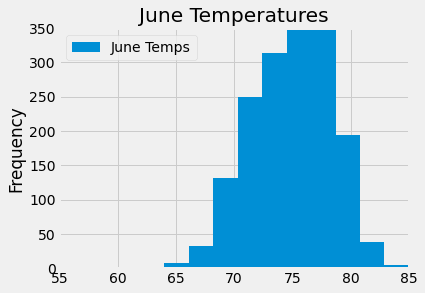

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
june_temp_df.plot.hist(bins=10)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55,85])
plt.ylim([0,350])

In [22]:
# Print the Dataframe without the index
print(december_temp_df.to_string(index=False))

 December Temps
           76.0
           74.0
           74.0
           64.0
           64.0
           67.0
           77.0
           66.0
           69.0
           68.0
           68.0
           71.0
           74.0
           67.0
           66.0
           69.0
           71.0
           70.0
           70.0
           74.0
           74.0
           71.0
           75.0
           75.0
           72.0
           69.0
           68.0
           73.0
           74.0
           73.0
           73.0
           73.0
           73.0
           71.0
           73.0
           73.0
           77.0
           72.0
           71.0
           73.0
           70.0
           73.0
           69.0
           74.0
           72.0
           71.0
           72.0
           72.0
           70.0
           73.0
           73.0
           72.0
           73.0
           73.0
           72.0
           63.0
           65.0
           71.0
           76.0
           70.0
           76.0
        

(0.0, 350.0)

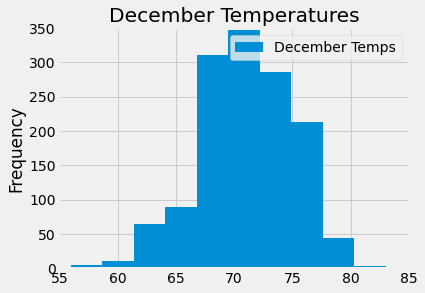

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
december_temp_df.plot.hist(bins=10)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,350])

In [24]:
# Print the Dataframe without the index
print(june_prcp_df.to_string(index=False))

 June Percipitation
               0.00
               0.01
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.02
               0.00
               0.00
               0.00
               0.00
               0.07
               0.00
               0.56
               0.89
               0.00
               0.00
               0.00
               0.03
               0.01
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.00
               0.05
               0.06


<AxesSubplot:>

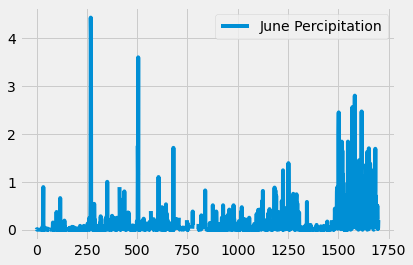

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
june_prcp_df.plot()

In [26]:
# Print the Dataframe without the index
print(december_prcp_df.to_string(index=False))

 December Percipitation
                   0.04
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   1.58
                   0.77
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   1.40
                   0.00
                   0.00
                    NaN
                   0.13
                   0.55
                   0.06
                   0.01
                   0.00
                   0.03
                   0.08
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   0.00
                   0.13
                   0.07
                   0.07
                   0.08
                   0.40
                   0.70
                   0.00
                

<AxesSubplot:>

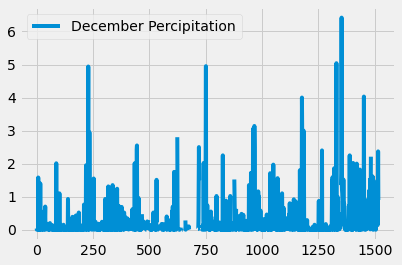

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
december_prcp_df.plot()